<a href="https://colab.research.google.com/github/Priyanka-43/CP1-24-HW5/blob/Padding%2Funpadding_of_the_Data/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


[1969 1970 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023]


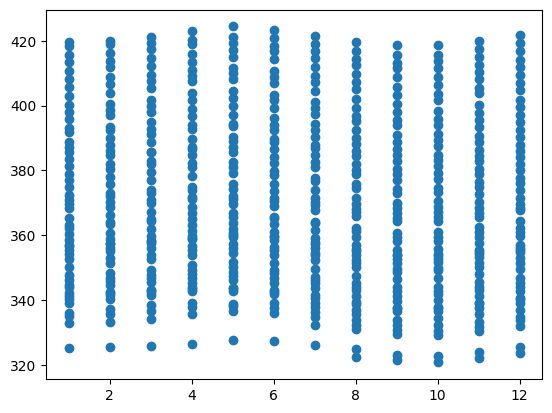

In [ ]:
data= pd.read_json('flask_monthly.json')

plt.scatter(data['Month'], data['CO2 (ppm)'])

x_ = data['Year']
x_unique = x_.unique()

print(x_unique)

#plt.scatter(range(len(x_['CO2 (ppm)'])), x_['CO2 (ppm)'])

In [ ]:
import pandas as pd
import numpy as np

def pad_time_series(series, target_length, padding_value=None):
    """
    Pads the given time series to the target length.

    Parameters:
    - series: pd.Series
        The input time series with datetime index.
    - target_length: int
        The desired length after padding.
    - padding_value: float or None
        The value to pad with. If None, will use the mean of the series.

    Returns:
    - pd.Series
        The padded time series.
    """
    # Determine current length
    current_length = len(series)

    # If current length is already equal to or greater than target, return the series
    if current_length >= target_length:
        return series

    # Determine padding length
    padding_length = target_length - current_length

    # If no padding value is provided, calculate a reasonable padding value
    if padding_value is None:
        padding_value = series.mean()  # You could also use median or any other method

    # Create a padding Series
    padding_index = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1),
                                   periods=padding_length, freq='D')
    padding_series = pd.Series(padding_value, index=padding_index)

    # Concatenate the original series with the padding
    padded_series = pd.concat([series, padding_series])

    return padded_series


def unpad_time_series(padded_series, original_length):
    """
    Unpads the given time series to the original length.

    Parameters:
    - padded_series: pd.Series
        The padded time series with datetime index.
    - original_length: int
        The original length of the series before padding.

    Returns:
    - pd.Series
        The unpadded time series.
    """
    # Return the original length of the series
    return padded_series.iloc[:original_length]





Original Time Series:
2023-01-01    400
2023-01-02    405
2023-01-03    402
2023-01-04    410
2023-01-05    415
Freq: D, dtype: int64

Padded Time Series:
2023-01-01    400.0
2023-01-02    405.0
2023-01-03    402.0
2023-01-04    410.0
2023-01-05    415.0
2023-01-06    406.4
2023-01-07    406.4
2023-01-08    406.4
2023-01-09    406.4
2023-01-10    406.4
Freq: D, dtype: float64

Unpadded Time Series:
2023-01-01    400.0
2023-01-02    405.0
2023-01-03    402.0
2023-01-04    410.0
2023-01-05    415.0
Freq: D, dtype: float64


Original Time Series:
1969-08-01    322.51
1969-09-01    321.36
1969-10-01    320.74
1969-11-01    321.98
1969-12-01    323.78
dtype: float64

Padded Time Series:
1969-08-01    322.510
1969-09-01    321.360
1969-10-01    320.740
1969-11-01    321.980
1969-12-01    323.780
1969-12-02    322.074
1969-12-03    322.074
1969-12-04    322.074
1969-12-05    322.074
1969-12-06    322.074
1969-12-07    322.074
1969-12-08    322.074
dtype: float64

Unpadded Time Series:
1969-08-01    322.51
1969-09-01    321.36
1969-10-01    320.74
1969-11-01    321.98
1969-12-01    323.78
dtype: float64


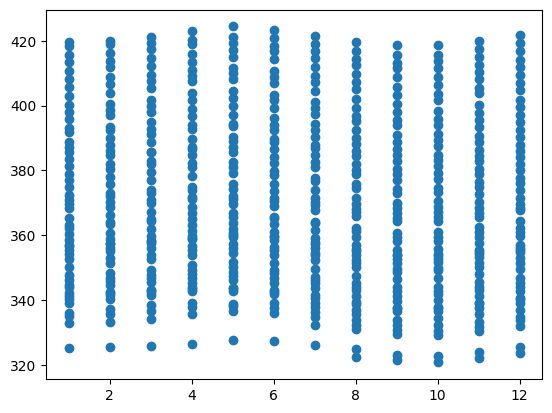

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_json('flask_monthly.json')

plt.scatter(data['Month'], data['CO2 (ppm)'])

x_ = data[data['Year'] == 1969]

# Example Usage
if __name__ == "__main__":
    # Sample time series
    # Create a datetime index using the Year and Month
    dates = pd.to_datetime(x_['Year'].astype(str) + '-' + x_['Month'].astype(str), format='%Y-%m')
    ts = pd.Series(x_['CO2 (ppm)'].values, index=dates) # Use values for the data to avoid alignment issues

    print("Original Time Series:")
    print(ts)

    # Pad the series to length 12
    padded_ts = pad_time_series(ts, target_length=12)
    print("\nPadded Time Series:")
    print(padded_ts)

    # Unpad to get back the original series
    unpadded_ts = unpad_time_series(padded_ts, original_length=len(ts))
    print("\nUnpadded Time Series:")
    print(unpadded_ts)

In [ ]:
data

,Year,Month,CO2 (ppm)
0,1969,8,322.51
1,1969,9,321.36
2,1969,10,320.74
3,1969,11,321.98
4,1969,12,323.78
...,...,...,...
582,2023,8,419.70
583,2023,9,418.84
584,2023,10,418.74
585,2023,11,419.85
